In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
dataset1 = '2-wayEpi_100feat.txt'
dataset2 = '4-wayAdditive_100feat.txt'
dataset3 = '2Additive_2-wayEpi_100feat.txt'
dataset4 = '4-wayHeterogeneous_100feat.txt'

In [288]:
dataset = dataset4
df = pd.read_csv(dataset, sep='\t')

In [289]:
# Setup the data 
df = df.dropna()
X = df.drop(columns=['Class'])
y = df['Class']
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,0,0,1,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,1,1,0,0,2,1,...,0,0,0,0,0,1,1,1,0,1
2,1,0,1,0,2,0,0,1,0,2,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,1,1,1,1,1,...,2,0,0,0,1,1,0,0,0,1
4,0,2,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


Class distribution
Class
1    500
0    500
Name: count, dtype: int64


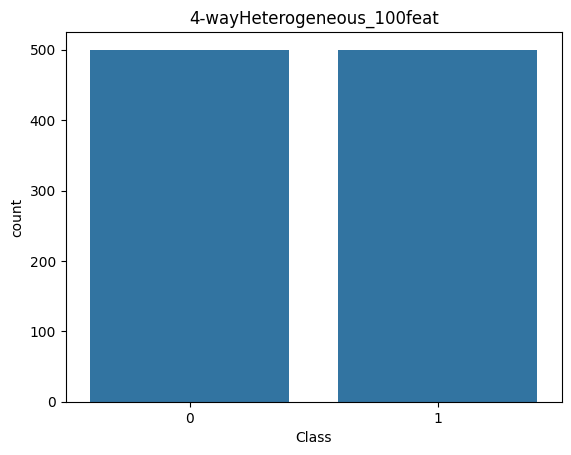

In [290]:
# Check for data imbalance
print('Class distribution')
print(y.value_counts())

# Plot the data
sns.countplot(x='Class', data=df)
plt.title(dataset[:-4])
plt.show()

In [291]:
# Print feature if it has missing values else print None
print('Features with missing values:')
if X.isnull().sum().any():
    print(X.columns[X.isnull().sum() > 0])
else:
    print('None')


Features with missing values:
None


In [292]:
# Create a new dataframe to store the p-values for each feature
p_values_df = pd.DataFrame(columns=['Feature', 'P-Value'])

Feature M2P3: log-transformed p-value =10.323138500288632
Feature M3P4: log-transformed p-value =10.175620703124094
Feature M1P2: log-transformed p-value =9.74356798630018
Feature M0P1: log-transformed p-value =8.447755278161402
Feature N48: log-transformed p-value =1.3350190738692158
Feature N20: log-transformed p-value =1.304574880790646
Feature N90: log-transformed p-value =1.1791906928310996
Feature N33: log-transformed p-value =1.0495926075674602
Feature N89: log-transformed p-value =0.9250068383539486
Feature N8: log-transformed p-value =0.9247792765888829
Feature N95: log-transformed p-value =0.8640219275151646
Feature N30: log-transformed p-value =0.8193456885325485
Feature N41: log-transformed p-value =0.8136285341042614
Feature N53: log-transformed p-value =0.7979033235684144
Feature N65: log-transformed p-value =0.7793321641059746
Feature N5: log-transformed p-value =0.7700768605902182
Feature N72: log-transformed p-value =0.7252772118048679
Feature N3: log-transformed p-val

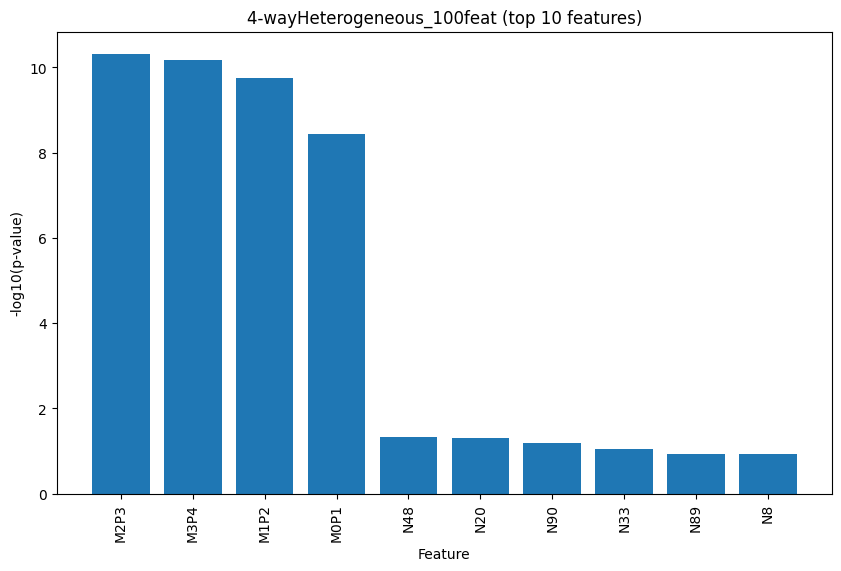

In [293]:
# Sort the log-transformed p-values in descending order
sorted_indices = np.argsort(log_p_values)[::-1]
sorted_log_p_values = log_p_values[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Print the sorted log-transformed p-values and the corresponding feature names
for i in range(len(sorted_log_p_values)):
    print(f'Feature {sorted_features[i]}: log-transformed p-value ={sorted_log_p_values[i]}')
    
# Get top 10 features along with class
top_features = sorted_features[:10]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), sorted_log_p_values[:10])
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('-log10(p-value)')
plt.title(dataset[:-4] + ' (top 10 features)')
plt.show()


